In [1]:
import numpy as np
from braket.aws import AwsDevice, AwsQuantumTask
from braket.devices import LocalSimulator
from braket.circuits import Circuit
from collections import Counter
from qiskit.visualization import plot_histogram

def cu1_unitary(p_lambda):
    return np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, np.exp(1j*p_lambda)]]);

def gate_Inverse_QFT_dg(a, b, c, d, e, f):
    circuit = Circuit()
    circuit.h(a)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[b, a])
    circuit.h(b)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[c, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[c, b])
    circuit.h(c)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[d, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, b])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[d, c])
    circuit.h(d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[e, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[e, b])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[e, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[e, d])
    circuit.h(e)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 32), targets=[f, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[f, b])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[f, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[f, d])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[f, e])
    circuit.h(f)
    return circuit

def circuit_4412(a, b, c, d, e, f, g, h, i):
    circuit = Circuit()
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    return circuit

def circuit_4415(a, b, c, d, e, f, g, h, i):
    circuit = Circuit()
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    return circuit

def circuit_4418(a, b, c, d, e, f, g, h, i):
    circuit = Circuit()
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    return circuit

def circuit_4421(a, b, c, d, e, f, g, h, i):
    circuit = Circuit()
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    return circuit

def circuit_4424(a, b, c, d, e, f, g, h, i):
    circuit = Circuit()
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    return circuit

def circuit_4427(a, b, c, d, e, f, g, h, i):
    circuit = Circuit()
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, b])
    circuit.phaseshift(a, 0)
    circuit.unitary(matrix=cu1_unitary(np.pi / 2), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(3 * np.pi / 16), targets=[b, c])
    circuit.cnot(a, b)
    circuit.unitary(matrix=cu1_unitary(-3 * np.pi / 16), targets=[a, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[a, d])
    circuit.phaseshift(a, np.pi / 2)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, e])
    circuit.cnot(a, d)
    circuit.unitary(matrix=cu1_unitary(np.pi / 4), targets=[a, e])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, f])
    circuit.phaseshift(a, np.pi / 8)
    circuit.unitary(matrix=cu1_unitary(np.pi / 8), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[f, g])
    circuit.cnot(a, f)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, g])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[a, h])
    circuit.phaseshift(a, np.pi / 4)
    circuit.unitary(matrix=cu1_unitary(0), targets=[a, i])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(np.pi / 16), targets=[h, i])
    circuit.cnot(a, h)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[a, i])
    return circuit

def gate_Inverse_QFT(a, b, c, d, e, f):
    circuit = Circuit()
    circuit.h(a)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[b, a])
    circuit.h(b)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[c, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[c, b])
    circuit.h(c)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[d, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[d, b])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[d, c])
    circuit.h(d)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[e, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[e, b])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[e, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[e, d])
    circuit.h(e)
    circuit.unitary(matrix=cu1_unitary(-np.pi / 32), targets=[f, a])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 16), targets=[f, b])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 8), targets=[f, c])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 4), targets=[f, d])
    circuit.unitary(matrix=cu1_unitary(-np.pi / 2), targets=[f, e])
    circuit.h(f)
    return circuit

circuit = Circuit()

circuit.register_subroutine(gate_Inverse_QFT_dg)
circuit.register_subroutine(circuit_4412)
circuit.register_subroutine(circuit_4415)
circuit.register_subroutine(circuit_4418)
circuit.register_subroutine(circuit_4421)
circuit.register_subroutine(circuit_4424)
circuit.register_subroutine(circuit_4427)
circuit.register_subroutine(gate_Inverse_QFT)

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)
circuit.h(4)
circuit.h(5)
circuit.x(6)
circuit.x(7)
circuit.x(11)
circuit.x(12)
circuit.circuit_4412(5, 6, 7, 8, 9, 10, 11, 12, 13)
circuit.circuit_4415(4, 6, 7, 8, 9, 10, 11, 12, 13)
circuit.circuit_4418(3, 6, 7, 8, 9, 10, 11, 12, 13)
circuit.circuit_4421(2, 6, 7, 8, 9, 10, 11, 12, 13)
circuit.circuit_4424(1, 6, 7, 8, 9, 10, 11, 12, 13)
circuit.circuit_4427(0, 6, 7, 8, 9, 10, 11, 12, 13)
circuit.gate_Inverse_QFT(0, 1, 2, 3, 4, 5)

Circuit('instructions': [Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(1)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(2)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(3)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(4)])), Instruction('operator': H('qubit_count': 1), 'target': QubitSet([Qubit(5)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(6)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(7)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(11)])), Instruction('operator': X('qubit_count': 1), 'target': QubitSet([Qubit(12)])), Instruction('operator': Unitary('qubit_count': 2), 'target': QubitSet([Qubit(5), Qubit(6)])), Instruction('operator': PhaseShift('angle': 0.0, 'qubit_count': 1), 'target': QubitSet([Qubit(5)]))

In [2]:
rigetti = AwsDevice("arn:aws:braket:us-west-1::device/qpu/rigetti/Aspen-M-2")
#sv1 = AwsDevice("arn:aws:braket:::device/quantum-simulator/amazon/sv1")
#local_sim = LocalSimulator()

Counter({'00100111000110': 8192})
COMPLETED


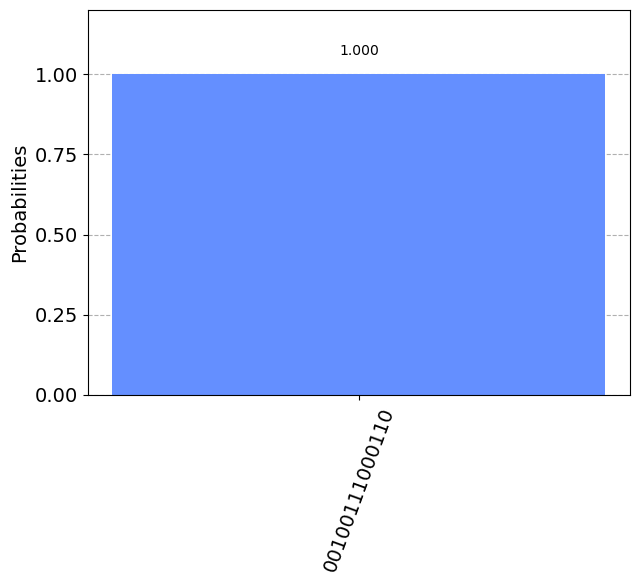

In [3]:
task = rigetti.run(circuit, shots=8192)
result = task.result()

counts = result.measurement_counts
print(counts)
arn = task.id
status = task.state()
print(status)
plot_histogram(counts)